In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm

In [25]:
# Load the dataset
file_path = 'clustering_data.csv'  
data = pd.read_csv(file_path, dtype={'Latitude': str, 'Longitude': str}, low_memory=False)

In [26]:
# Filter the dataset for Telangana
telangana_data = data[data['StateName'].str.upper() == 'TELANGANA'].copy()

In [27]:
# Drop rows with missing latitude or longitude
telangana_data_cleaned = telangana_data.dropna(subset=['Latitude', 'Longitude']).copy()

In [28]:
# Convert Latitude and Longitude to float
telangana_data_cleaned['Latitude'] = telangana_data_cleaned['Latitude'].astype(float)
telangana_data_cleaned['Longitude'] = telangana_data_cleaned['Longitude'].astype(float)

In [29]:
# Define the bounding box for Telangana
min_lat, max_lat = 15.5, 19.5  # Approximate latitude range for Telangana
min_lon, max_lon = 77, 82.5    # Approximate longitude range for Telangana

In [30]:
# Filter data within the bounding box
telangana_data_filtered = telangana_data_cleaned[
    (telangana_data_cleaned['Latitude'] >= min_lat) &
    (telangana_data_cleaned['Latitude'] <= max_lat) &
    (telangana_data_cleaned['Longitude'] >= min_lon) &
    (telangana_data_cleaned['Longitude'] <= max_lon)
]

In [31]:
# Prepare the data
X = telangana_data_filtered[['Latitude', 'Longitude']].values

In [32]:
# KMeans Algorithm
def initialize_centroids(X, k):
    np.random.seed(0)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

In [33]:
def compute_distances(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return distances

In [34]:
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    labels = np.argmin(distances, axis=1)
    return labels

In [35]:
def compute_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [36]:
def k_means(X, k, max_iters=300, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = compute_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return labels, centroids

In [37]:
# Using the elbow method to find the optimal number of clusters, wcss(within cluster sum of squares)
def calculate_wcss(X, max_clusters=40):
    wcss = []
    for i in range(1, max_clusters + 1):
        labels, centroids = k_means(X, i)
        wcss.append(np.sum((X - centroids[labels])**2))
    return wcss

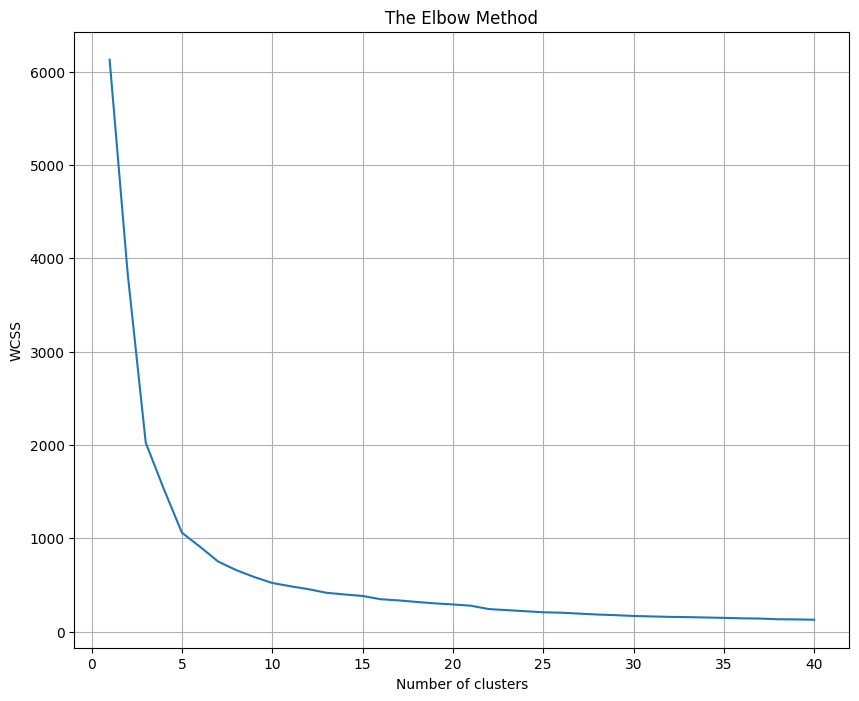

In [38]:
# Plot the graph to visualize the Elbow Method to find the optimal number of clusters
wcss = calculate_wcss(X)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 41), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

In [39]:
# Determine the optimal number of clusters (manual selection based on elbow plot)
optimal_clusters = np.argmin(np.gradient(np.gradient(wcss))) + 1

In [40]:
# Apply k-means clustering with the optimal number of clusters
labels, centroids = k_means(X, optimal_clusters)

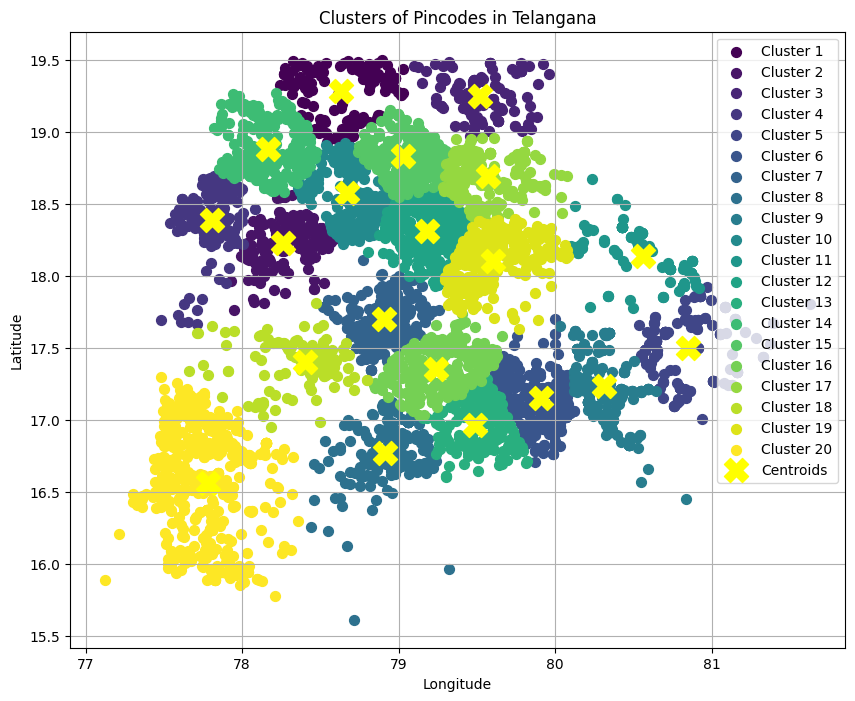

In [44]:
# Visualizing the clusters using a colormap
plt.figure(figsize=(10, 8))
colormap = plt.cm.viridis  # Directly access the colormap, virdis
norm = Normalize(vmin=0, vmax=optimal_clusters - 1)  # Normalize the colormap
for i in range(optimal_clusters):
    plt.scatter(X[labels == i, 1], X[labels == i, 0], s=50, c=[colormap(norm(i))], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 1], centroids[:, 0], s=300, c='yellow', marker='X', label='Centroids')
plt.title('Clusters of Pincodes in Telangana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.savefig('pincode_clusters.png')
plt.show()  

Based on the plot shown, it shows that the optimal number of clusters is 20

We observe certain regions with a higher density of pincodes, indicating a larger population in that region
